In [1]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import img_to_array
from keras.models import load_model

/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python2.7/site-packages/matplotlib/__init__.py:1101: UserWarning: Bad val "TkAggX" on line #1
	"backend: TkAggX
"
	in file "/Users/costefan/.matplotlib/matplotlibrc"
	Key backend: Unrecognized backend string "tkaggx": valid strings are ['pgf', 'Qt4Cairo', 'cairo', 'MacOSX', 'TkCairo', 'gdk', 'ps', 'GTKAgg', 'nbAgg', 'GTK', 'Qt5Agg', 'template', 'Qt5Cairo', 'WXCairo', 'GTK3Cairo', 'GTK3Agg', 'WX', 'Qt4Agg', 'TkAgg', 'agg', 'svg', 'GTKCairo', 'WXAgg', 'WebAgg', 'pdf']
  (val, error_details, msg))


In [3]:
MODEL_PATH = "../models/gender_classification/gender_classification.model"
CLASSES = ["man", "woman"]

In [114]:
def _preprocess_image(image):
    image = cv2.resize(image, (96,96))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    return image

In [115]:
def _get_label_from_prediction(prediction):
    confidence = prediction[0]
    idx = np.argmax(confidence)
    label = CLASSES[idx]
    return label

In [116]:
def _load_image_by_path(image_path):
    image = cv2.imread(image_path)
    return image

In [117]:
model = load_model(MODEL_PATH)

In [121]:
image_example_w = "../models/gender_classification/predict_data_test/1.jpg"
image_example_m = "../models/gender_classification/predict_data_test/2.jpg"

In [123]:
image_w = cv2.imread(image_example_w)
image_m = cv2.imread(image_example_m)


In [124]:
image_w = _preprocess_image(image_w)
image_m = _preprocess_image(image_m)

In [125]:
image_w.shape

(1, 96, 96, 3)

In [126]:
_get_label_from_prediction(model.predict(image_w))

'woman'

In [127]:
_get_label_from_prediction(model.predict(image_m))

'man'

In [135]:
images_example = [
    "../models/gender_classification/predict_data_test/1.jpg",
    "../models/gender_classification/predict_data_test/2.jpg",
    "../models/gender_classification/predict_data_test/3.jpg",
    "../models/gender_classification/predict_data_test/4.jpg",
]

prepared_batch = []
for img_path in images_example:
    print(img_path)
    image_ = cv2.imread(img_path)
    image_ = _preprocess_image(image_)
    print(_get_label_from_prediction(model.predict(image_)))
    prepared_batch.append(np.squeeze(image_))
    
prepared_batch = np.array(prepared_batch)

../models/gender_classification/predict_data_test/1.jpg
woman
../models/gender_classification/predict_data_test/2.jpg
man
../models/gender_classification/predict_data_test/3.jpg
man
../models/gender_classification/predict_data_test/4.jpg
woman


In [136]:
prepared_batch.shape

(4, 96, 96, 3)

In [137]:
import shap
import numpy as np

In [138]:
e = shap.DeepExplainer(model, prepared_batch)

In [139]:
shap_values = e.shap_values(prepared_batch)

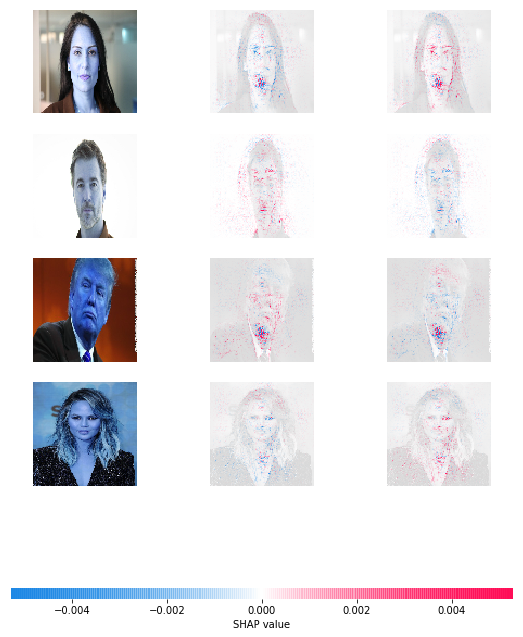

In [140]:
shap.image_plot(shap_values, prepared_batch)